## Data 분석 결과를 보고할 때 유용한 툴
### 1. R markdown
### 2. R shiny
#### R의 강력한 그래픽 기능과 통계 분석 능력을 이용하고 사용자 상호작용을 쉽게 만들 수 있는 언어. 샤이니 패키지를 이용해서 편하게 사용자 인터페이스를 이용할 수 있다.
```
    <R shiny 기본 골격>
           UI            &           Server
        frontier                  backend tier
        화면                      화면에서 요청한 데이터를 처리하는 부분
```
```
    UI     <- (화면 개발에 필요한 코드 작성
                ① csv file 불러오기
                ② 결과 출력)
    Server <- (서버단 코드 작성
                ① data를 시각화 코드
                    - 막대그래프
                    - 원형그래프
                    - 라인그래프
                    - 히스토그램 그래프
                    - 사분위수 그래프
                ② ML 알고리즘 구현하는 코드)
    실행하는 명령어 <- shinyApp(ui=ui, server=server)
    ```

In [2]:
library(shiny)
library(DT)
library(ggplot2)

Warning message:
"package 'DT' was built under R version 3.6.3"
Attaching package: 'DT'

The following objects are masked from 'package:shiny':

    dataTableOutput, renderDataTable

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [ ]:
ui<-fluidPage()
server<-function(input, output){
    
}
shinyApp(ui=ui, server=server)


Listening on http://127.0.0.1:7208


In [ ]:
ui<-fluidPage(
    titlePanel('sidebar panel'),
    mainPanel('main panel')
)
server<-function(input, output){
    
}
shinyApp(ui=ui, server=server)

### ※ 문제101. title panel을 데이터 시각화 소프트웨어란 이름으로 변경하시오

In [ ]:
ui<-fluidPage(
  titlePanel('Data Visualize Software'),
  sidebarLayout(
    sidebarPanel('sidebar panel'),
    mainPanel('main panel')
  )
)
server<-function(input, output){
  
}
shinyApp(ui=ui, server=server)

### ※ 문제102. 아래의 코드를 이용해서 기본 테이블 형태의 데이터 출력하는 화면을 완성하시오
```R
#install.packages("DT")
library(DT)
library(shiny)
library(ggplot2)
emp <- read.csv("emp3.csv",header=T)

# Define UI ----
ui <- fluidPage(
  titlePanel("EMP DataTable"),
  # Create a new Row in the UI for selectInputs
  # Create a new row for the table.
  DT::dataTableOutput("table")
)
# Define server logic ----
server <- function(input, output) {
  # Filter data based on selections
  output$table <- DT::renderDataTable(DT::datatable({
    data <- emp
  }))
}

# Run the app ----
shinyApp(ui = ui, server = server)
```

In [6]:
emp <- read.csv("emp3.csv",header=T,stringsAsFactors = F)

In [7]:
str(emp)

'data.frame':	14 obs. of  9 variables:
 $ index   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ empno   : int  7839 7698 7782 7566 7654 7499 7844 7900 7521 7902 ...
 $ ename   : chr  "KING" "BLAKE" "CLARK" "JONES" ...
 $ job     : chr  "PRESIDENT" "MANAGER" "MANAGER" "MANAGER" ...
 $ mgr     : int  NA 7839 7839 7839 7698 7698 7698 7698 7698 7566 ...
 $ hiredate: chr  "1981-11-17 0:00" "1981-05-01 0:00" "1981-05-09 0:00" "1981-04-01 0:00" ...
 $ sal     : int  5000 2850 2450 2975 1250 1600 1500 950 1250 3000 ...
 $ comm    : int  NA NA NA NA 1400 300 0 NA 500 NA ...
 $ deptno  : int  10 30 10 20 30 30 30 30 30 20 ...


In [ ]:
# Define UI ----
ui <- fluidPage(
  titlePanel("EMP DataTable"),
  # Create a new Row in the UI for selectInputs
  # Create a new row for the table.
  DT::dataTableOutput("table") # dataTable 만들 수 있도록 설정 (server에서 생성한 데이터를 받도록 동일한 변수명 설정)
)

# Define server logic ----
server <- function(input, output) {
  # Filter data based on selections
  output$table <- DT::renderDataTable(DT::datatable({ # server에서 생성된 output$table dat를 ui table 변수로 전송
    data <- emp # ↑ data를 table화 하는 코드
  }))
}

# Run the app ----
shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:7697


### ※ 문제103. emp테이블의 월급으로 기본적인 막대그래프를 그리시오

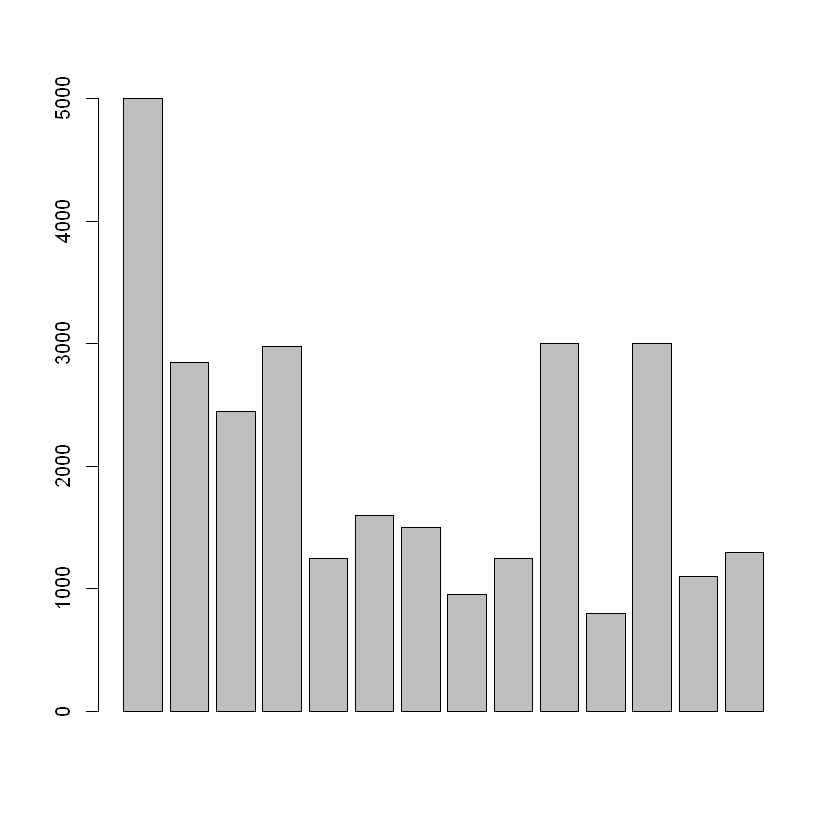

In [2]:
emp<-read.csv('emp3.csv',header=T, stringsAsFactors=F)
barplot(emp$sal)

### ※ 문제104. 위의 그래프의 제목을 Salary Bar Chart라고 이름을 붙이시오

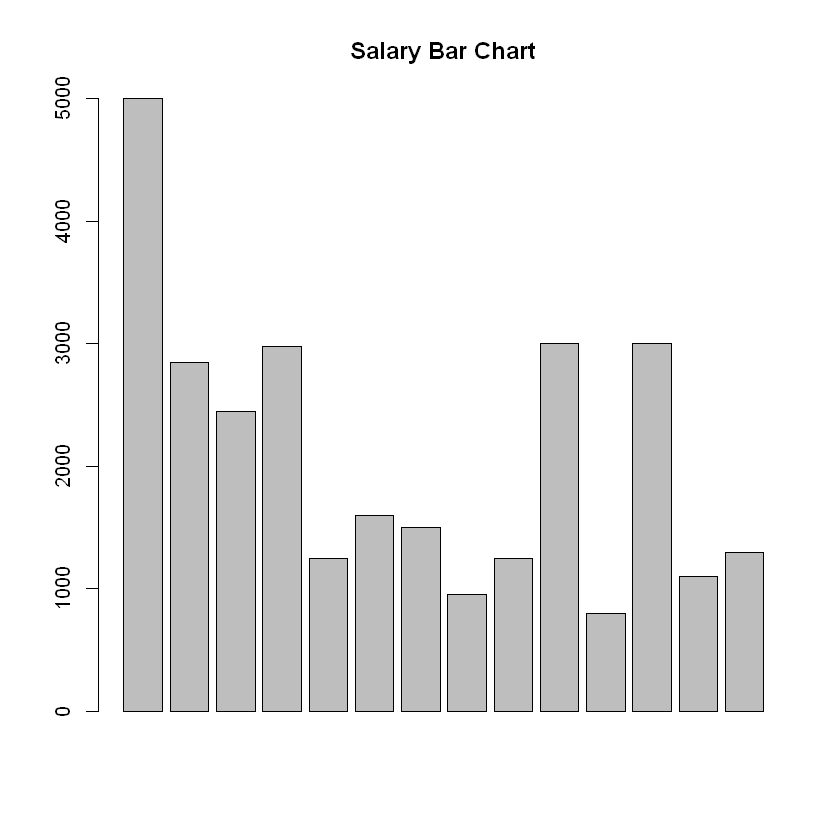

In [3]:
barplot(emp$sal, main='Salary Bar Chart')

### ※ 문제105. 막대 그래프의 x축에 사원 이름을 붙이시오

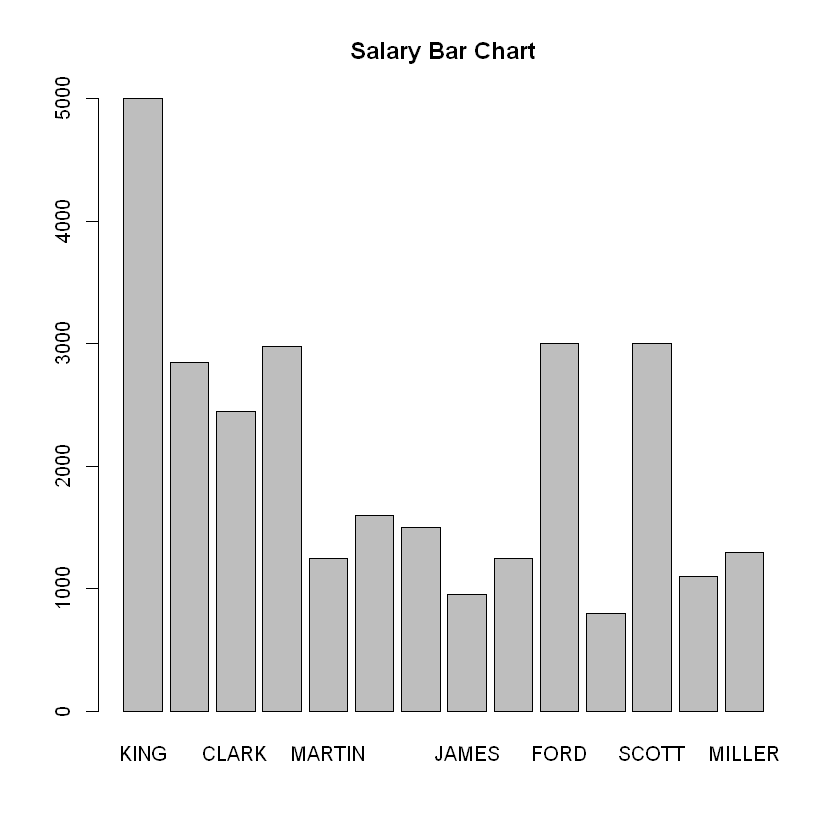

In [5]:
barplot(emp$sal, main='Salary Bar Chart',names.arg=emp$ename)

### ※ 문제106. 막대 그래프 y축의 이름을 salary라고 지정하시오

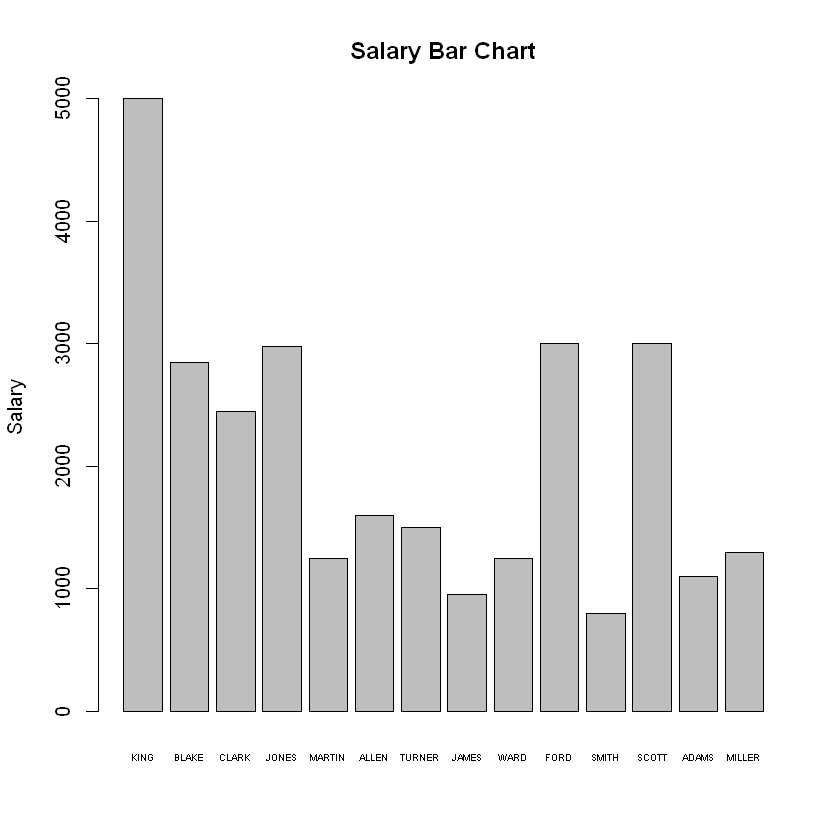

In [12]:
barplot(emp$sal, main='Salary Bar Chart',names.arg=emp$ename, ylab='Salary',cex.names = 0.47)

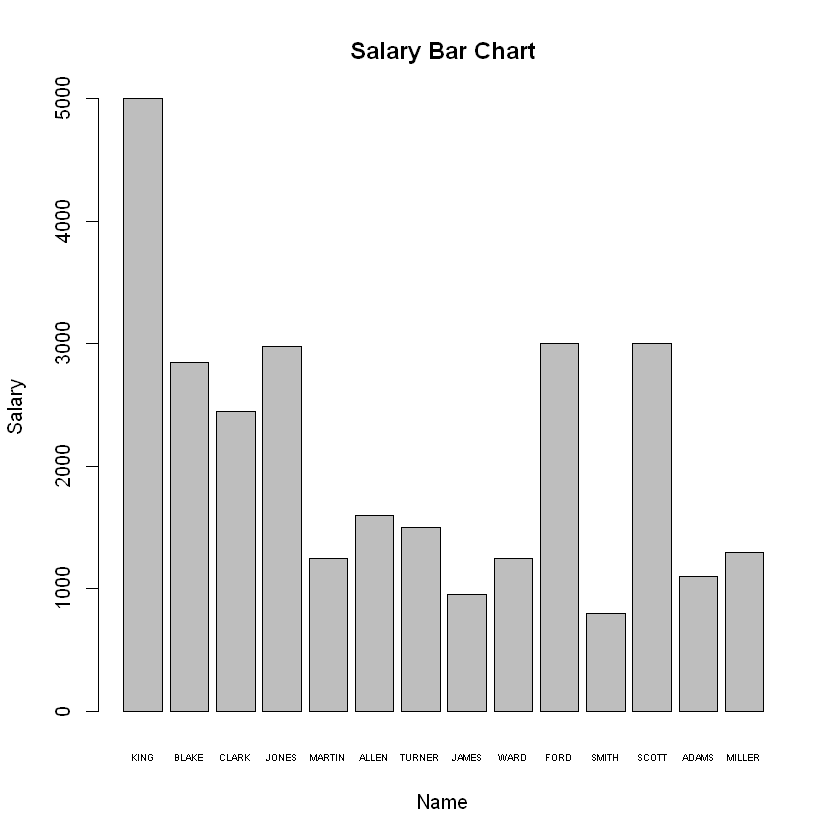

In [15]:
barplot(emp$sal, main='Salary Bar Chart',names.arg=emp$ename, ylab='Salary',xlab='Name',cex.names = 0.47)

### ※ 문제107. 막대 그래프의 색깔을 파란색으로 출력하시오

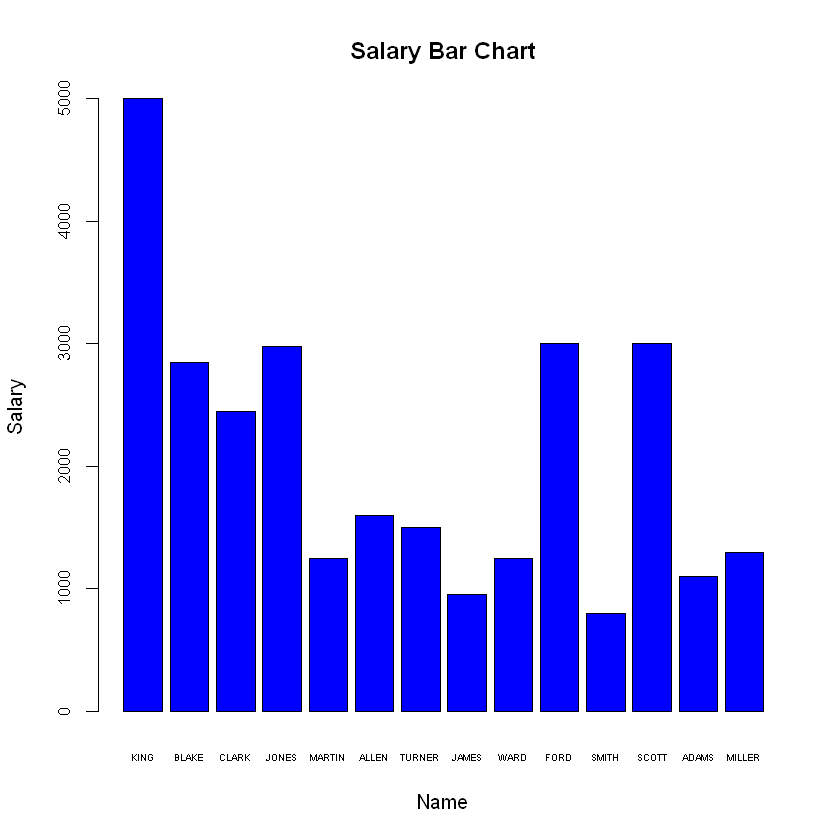

In [21]:
barplot(emp$sal, main='Salary Bar Chart',names.arg=emp$ename, ylab='Salary',xlab='Name',col='blue',cex.axis = 0.8,cex.name=0.47)

### ※ 문제108. 창업건수.csv 를 R로 로드하고 치킨집의 창업건수를 막대 그래프로 시각화 하시오 !

In [35]:
create_cnt<-read.csv('창업건수.csv',header=T)
create_cnt

년도,미용실,양식집,일식집,치킨집,커피음료,한식음식점,호프간이주점
2005,2196,1034,540,530,454,5994,635
2006,2028,950,577,525,483,5504,591
2007,1802,1036,620,507,575,6148,544
2008,1691,1127,561,543,772,6036,525
2009,1826,1086,645,711,845,6577,627
2010,1798,1105,669,865,1291,6689,553
2011,1688,1199,736,837,1671,6900,638
2012,1767,1183,753,986,1847,7082,687
2013,1965,1432,839,954,2287,7708,769
2014,1980,1870,1095,1193,3053,9772,1272


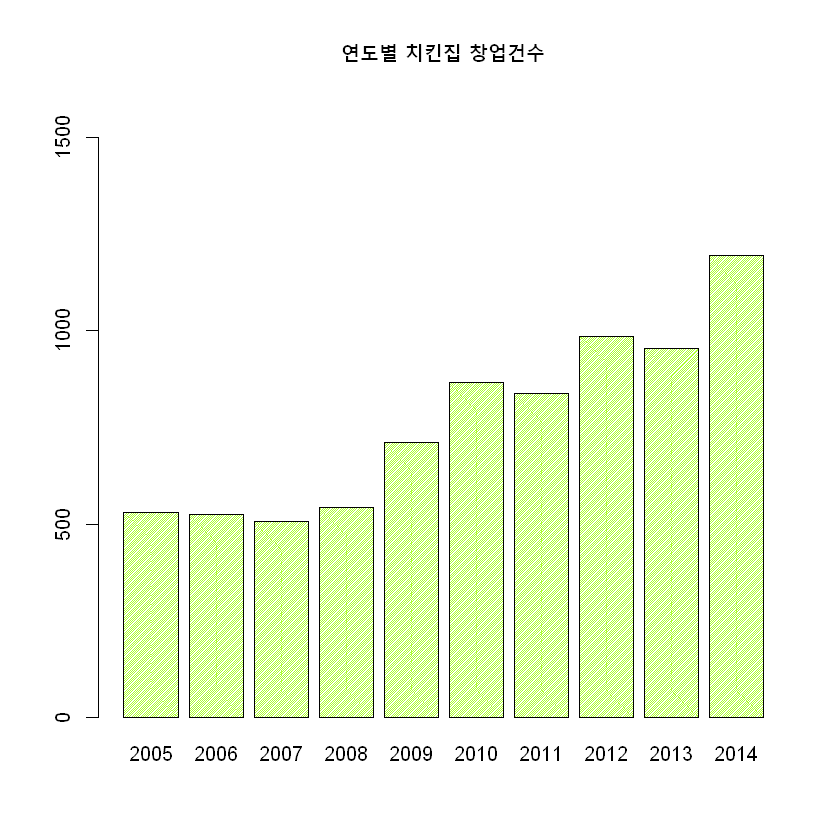

In [36]:
barplot(create_cnt$치킨집, main='연도별 치킨집 창업건수',names.arg=createcnt$년도, col='Green Yellow',density=80, ylim=c(0,1600))

### ※ 문제109. 폐업건수.csv를 R로 로드하시오

In [30]:
drop_cnt<-read.csv('폐업건수.csv',header=T)
drop_cnt

년도,미용실,양식집,일식집,치킨집,커피음료,한식음식점,호프간이주점
2005,2241,1354,497,353,545,6604,599
2006,2118,1094,440,405,494,5782,589
2007,1940,1126,458,3579,486,5172,552
2008,1706,827,446,399,553,4987,555
2009,1518,876,470,308,493,4888,460
2010,1543,834,489,464,598,4764,519
2011,1508,877,478,538,711,5200,450
2012,1325,785,443,510,786,4210,405
2013,1257,801,433,560,845,4752,467
2014,1279,776,439,511,998,4010,378


### ※ 문제110. 치킨집 창업건수의 막대그래프 코드를 이용해서 치킨집 폐업건수를 막대그래프로 시각화 하시오

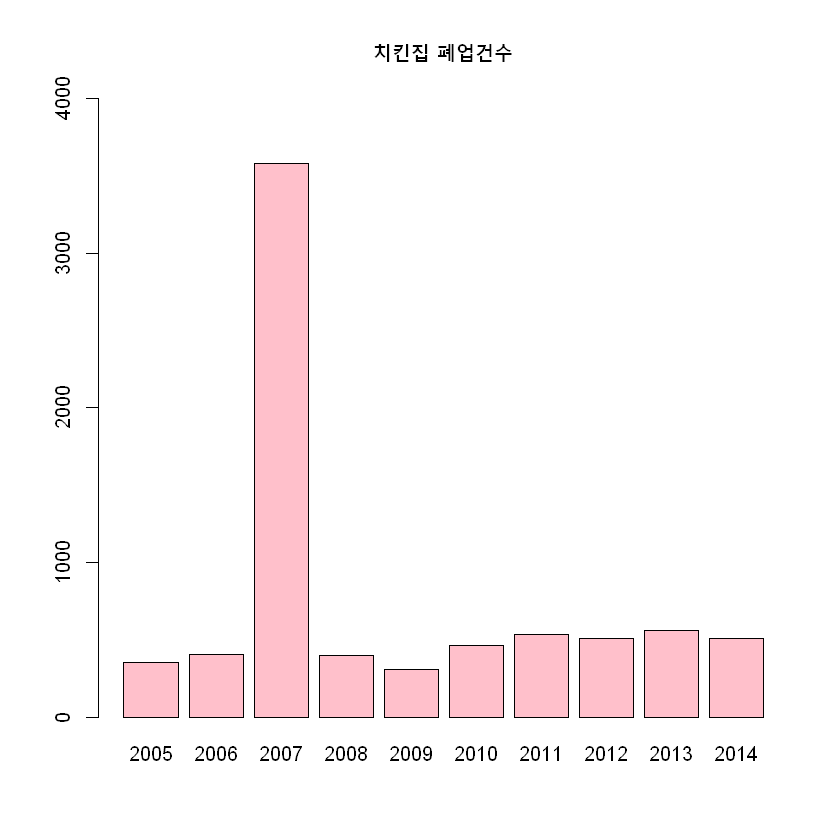

In [34]:
barplot(drop_cnt$치킨집,main='치킨집 폐업건수', names.arg=drop_cnt$년도,col='pink',ylim=c(0,4000))

### ※ 문제111. 치킨집 연도별 창업건수, 폐업건수를 같이 막대 그래프로 시각화 하시오

In [39]:
x<-rbind(create_cnt$치킨집, drop_cnt$치킨집)
rownames(x)=c('창업','폐업')
colnames(x)=drop_cnt$년도
x

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
창업,530,525,507,543,711,865,837,986,954,1193
폐업,353,405,3579,399,308,464,538,510,560,511


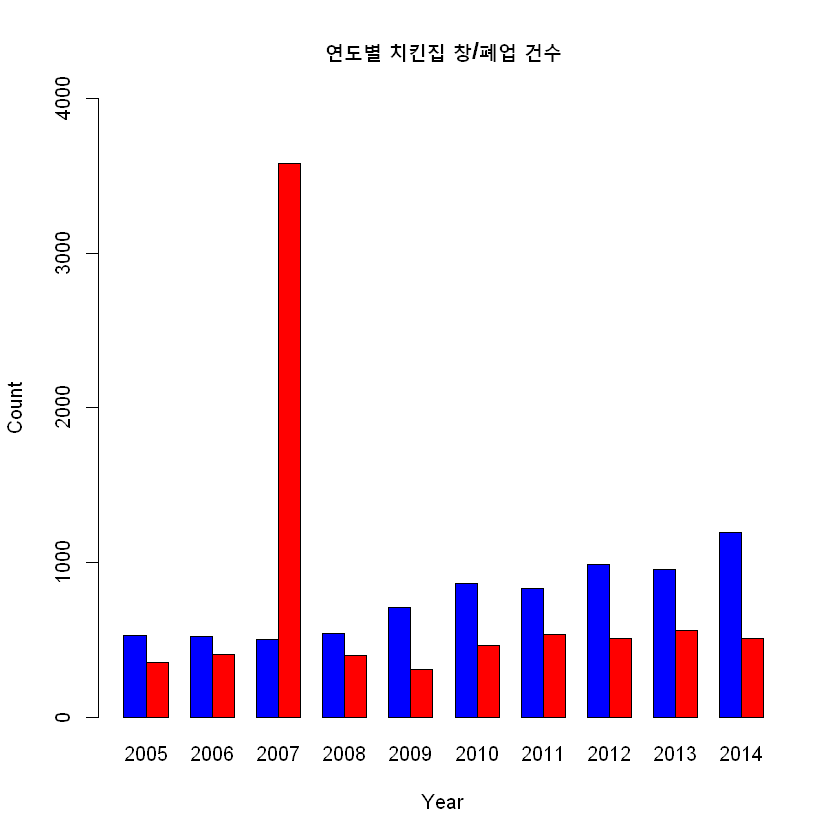

In [45]:
barplot(x, main='연도별 치킨집 창/폐업 건수',names.arg=drop_cnt$년도,col=c('blue','red'),beside=T,ylab='Count',xlab='Year',ylim=c(0,4000))

### ※ 문제112. 위의 그래프에 legend를 달아서 파란색을 창업이고 빨간색을 폐업이다 라고 하시오

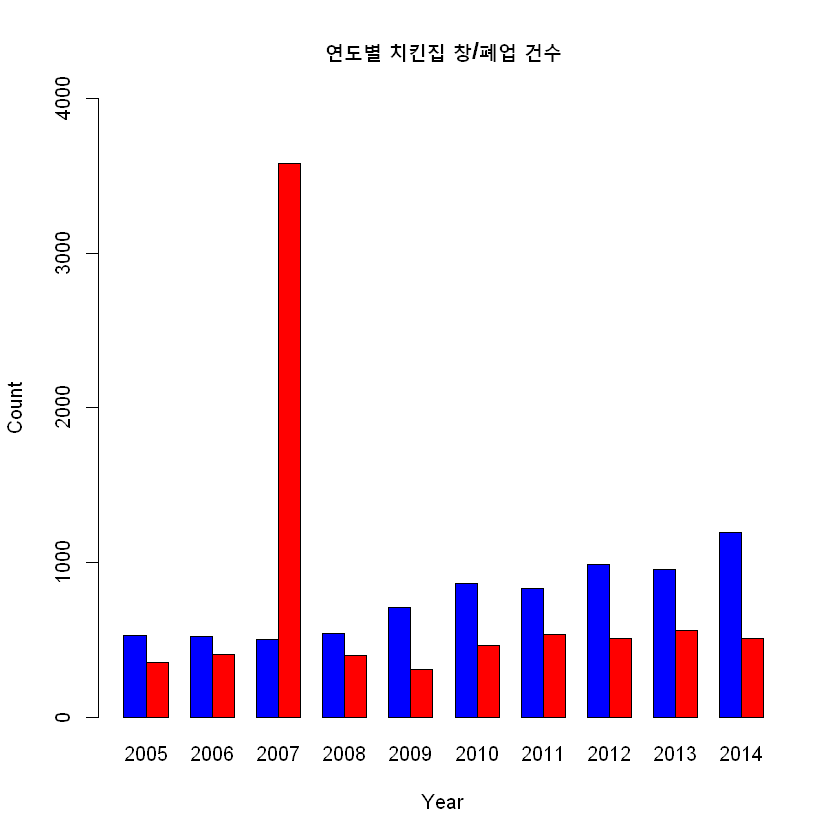

In [57]:
barplot(x, main='연도별 치킨집 창/폐업 건수',names.arg=drop_cnt$년도,col=c('blue','red'),beside=T,ylab='Count',xlab='Year',ylim=c(0,4000),
        args.legend=list(x='topright',bty='n',inset=c(-5,-5)))

### ※ 문제113. 카페(커피음료)가 얼마나 창업하고 얼마나 폐업하는지 막대그래프로 시각화 하시오

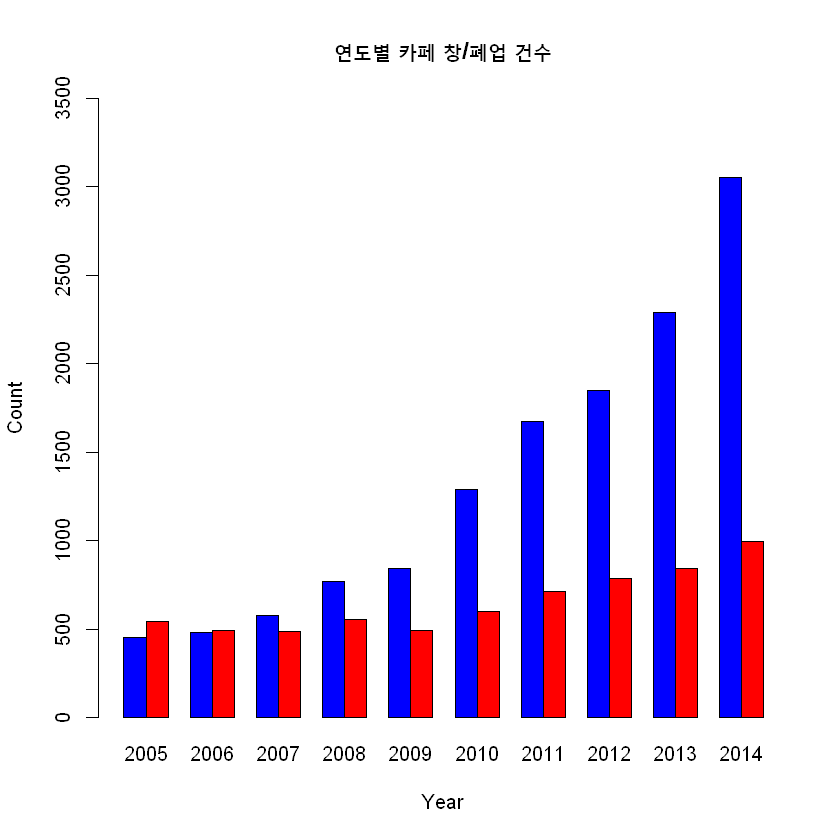

In [60]:
x<-rbind(create_cnt$커피음료, drop_cnt$커피음료)
rownames(x)=c('창업','폐업')
colnames(x)=drop_cnt$년도
barplot(x,col=c('blue','red'),main='연도별 카페 창/폐업 건수',xlab='Year',ylab='Count',beside=T,ylim=c(0,3500),args.legend=list(x='center',bty='n',inset=c(0,-1)))

### ※ 문제114. 위에서 그린 막대 그래프를 R 샤이니로 자동화 시키는 기본 코드를 돌려보시오

In [ ]:
library(shiny)
setwd("d:/R") 
create_cnt <- read.csv("창업건수.csv", header=T)
# Define UI ----
ui <- fluidPage(    
  # Give the page a title
  titlePanel("년도별 업종별 창업현황"),
  # Generate a row with a sidebar 
  sidebarLayout(      
    # Define the sidebar with one input
    sidebarPanel(############################################## 데이터 입력에 대한 화면 구현
      selectInput("region", "업종:",########################### selectInput에서 설정한 변수를 server에서 데이터를 받아온다.
                  choices=colnames(create_cnt)[-1]),
      helpText("업종별 창업과 폐업 현황 보고서")
    ),
    # Create a spot for the barplot
    mainPanel(
      plotOutput("typePlot")  ################################# output$typePlot data를 받아서 main panel에서 출력(plotOutput)
    )
  )
)

# Define server logic ----
server <-function(input, output) {
  # Fill in the spot we created for a plot
  output$typePlot <- renderPlot({
    # Render a barplot
    barplot(create_cnt[,input$region], ####################### input$변수 -> column 데이터 
            main=input$region,
            col = rainbow(10),
            density=50,
            names.arg= create_cnt$년도,    
            ylab="건수",
            xlab="년도")
  })
}
# Run the app ----
shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:7999


### ※ 문제115. 폐업건수.csv를 로드해서 자동으로 업종을 골라서 막대그래프로 시각화 할 수 있도록 하시오

In [ ]:
create_cnt <- read.csv("창업건수.csv", header=T)
drop_cnt <- read.csv('폐업건수.csv',header=T)
x=rbind(create_cnt,drop_cnt)
# Define UI ----
ui <- fluidPage(    
  # Give the page a title
  titlePanel("년도별 업종별 폐업현황"),
  # Generate a row with a sidebar
  sidebarLayout(      
    # Define the sidebar with one input
    sidebarPanel(############################################## 데이터 입력에 대한 화면 구현
      selectInput("region", "업종:",########################### selectInput에서 설정한 변수를 server에서 데이터를 받아온다.
                  choices=colnames(create_cnt)[-1]),
      helpText("업종별 창업과 폐업 현황 보고서")
    ),
    # Create a spot for the barplot
    mainPanel(
      plotOutput("typePlot")  ################################# output$typePlot data를 받아서 main panel에서 출력(plotOutput)
    )
  )
)

# Define server logic ----
server <-function(input, output) {
  # Fill in the spot we created for a plot
  output$typePlot <- renderPlot({
    # Render a barplot
    barplot(drop_cnt[,input$region], ####################### input$변수 -> column 데이터 
            main=input$region,
            col = rainbow(10),
            density=50,
            names.arg= drop_cnt$년도,    
            ylab="건수",
            xlab="년도")
  })
}
# Run the app ----
shinyApp(ui = ui, server = server)

In [17]:
create_cnt <- read.csv("창업건수.csv", header=T)
drop_cnt <- read.csv('폐업건수.csv',header=T)
x=rbind(create_cnt,drop_cnt)


년도,미용실,양식집,일식집,치킨집,커피음료,한식음식점,호프간이주점
2005,2196,1034,540,530,454,5994,635
2006,2028,950,577,525,483,5504,591
2007,1802,1036,620,507,575,6148,544
2008,1691,1127,561,543,772,6036,525
2009,1826,1086,645,711,845,6577,627
2010,1798,1105,669,865,1291,6689,553
2011,1688,1199,736,837,1671,6900,638
2012,1767,1183,753,986,1847,7082,687
2013,1965,1432,839,954,2287,7708,769
2014,1980,1870,1095,1193,3053,9772,1272


### ※ 문제116. R shiny로 창업과 폐업을 같이 출력되게 하게끔 코드를 수정하시오

In [ ]:
library(shiny)
library(datasets)
create_cnt <- read.csv("창업건수.csv", header=T)
drop_cnt <- read.csv("폐업건수.csv", header=T) 

# Define UI ----
ui <- fluidPage(    
  # Give the page a title
  titlePanel("연도별 업종별 창/폐업현황"),
  # Generate a row with a sidebar
  sidebarLayout(      
    # Define the sidebar with one input
    sidebarPanel(
      selectInput("region", "업종:", 
                  choices=colnames(create_cnt)[-1]),
      hr(),
      helpText("업종별 창업과 폐업 현황 보고서")
    ),
    # Create a spot for the barplot
    mainPanel(
      plotOutput("typePlot")  
    )
  )
)

# Define server logic ----
server <-function(input, output) {
  # Fill in the spot we created for a plot
  output$typePlot <- renderPlot({
    # Render a barplot
 barplot( rbind( create_cnt[,input$region], ################ rbind를 이용해서 두 개 이상의 데이터를 묶어서 표현
                 drop_cnt[,input$region] ),
            main=input$region,
            col = c("blue","red"),########################## 데이터의 개수 만큼 color값도 combine해서 부여
            beside=T, ###################################### 각각 확인할 수 있도록 beside값 true
            density=50,
            names.arg= create_cnt$년도,    
            ylab="Count",
            xlab="Year")
  })
}

# Run the app ----
shinyApp(ui = ui, server = server)

### ※ 문제117. 위에서 구현한 샤이니 화면에 legend 도 출력되게 하시오!

In [ ]:
library(shiny)
library(datasets)
create_cnt <- read.csv("창업건수.csv", header=T)
drop_cnt <- read.csv("폐업건수.csv", header=T) 

# Define UI ----
ui <- fluidPage(    
  # Give the page a title
  titlePanel("연도별 업종별 창/폐업현황"),
  # Generate a row with a sidebar
  sidebarLayout(      
    # Define the sidebar with one input
    sidebarPanel(
      selectInput("region", "업종:", 
                  choices=colnames(create_cnt)[-1]),
      hr(),
      helpText("업종별 창업과 폐업 현황 보고서")
    ),
    # Create a spot for the barplot
    mainPanel(
      plotOutput("typePlot")  
    )
  )
)

# Define server logic ----
server <-function(input, output) {
  # Fill in the spot we created for a plot
  output$typePlot <- renderPlot({
    # Render a barplot
 barplot( rbind( create_cnt[,input$region], ################ rbind를 이용해서 두 개 이상의 데이터를 묶어서 표현
                 drop_cnt[,input$region] ),
            main=input$region,
            col = c("blue","red"),########################## 데이터의 개수 만큼 color값도 combine해서 부여
            beside=T, ###################################### 각각 확인할 수 있도록 beside값 true
            density=50,
            names.arg= create_cnt$년도,    
            ylab="Count",
            xlab="Year")
  })
}

# Run the app ----
shinyApp(ui = ui, server = server)